# 이디야는 스타벅스 옆에 입점할까?

In [1]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install –upgrade pandas==0.23.4
# !pip install folium==0.5.0

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [3]:
# Window에서는 dir을 사용합니다.
%ls data

 D 드라이브의 볼륨: d_data_drive
 볼륨 일련 번호: A48A-CA16

 D:\Workspace\datasci_2020\ep_01_ediya_around_starbucks\data 디렉터리

2020-02-25  오전 08:33    <DIR>          .
2020-02-25  오전 08:33    <DIR>          ..
2020-02-25  오전 08:08            57,756 seoul_municipalities_geo_simple.json
2020-02-25  오전 08:16       348,304,419 소상공인시장진흥공단_상가업소정보_201906.zip
2019-06-28  오후 12:09       304,982,279 소상공인시장진흥공단_상가업소정보_201906_01.csv
2019-06-28  오후 12:27       277,288,864 소상공인시장진흥공단_상가업소정보_201906_02.csv
2019-06-28  오후 12:56       461,923,224 소상공인시장진흥공단_상가업소정보_201906_03.csv
2019-06-28  오후 01:29       411,687,460 소상공인시장진흥공단_상가업소정보_201906_04.csv
               6개 파일       1,804,244,002 바이트
               2개 디렉터리  86,315,536,384 바이트 남음


In [4]:
import warnings
warnings.filterwarnings('ignore')
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [5]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

# 한글 설정을 위해
sns.set(font='Noto Sans CJK JP') 

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
#plt.rc('font', family='AppleGothic') 

# 1. 그럴듯한 가설, "이디야는 스타벅스 옆에 입점한다"

[스타벅스 옆을 사수하라, 이디야](https://www.edaily.co.kr/news/read?newsId=01105366609365640&mediaCodeNo=257)



## 이에 대한 여러 그럴듯한 설명들
1. 입지분석은 비용이 드는 일
1. 후발주자로서 선발주자가 다져놓은 상권에 침투
1. 넘쳐 나오는 손님, 가격을 중시하는 손님을 끌어모으기 위함


## 유사한 질문들도 가능하다
- 커피 숍들은 몰려서 입점할까?
- 커피 매장과 빵/도너츠 매장의 입지조건은 유사할까?
- 파리 바게트가 있으면, 뚜레쥬르가 입점 안할까?
- 정말로 집갑은 학원하고 밀접한 관련이 있을까?
- 내가 퇴직하고 치킨집을 내려면 어디에 내야할까?
- 베스킨라빈스와 던킨은 서로 보완적일까 경쟁적일까?



# 2. 어떻게 검증할 수 있을까

어떤 데이터가 가용하고, 어디서 구할 수 있는지를 알아야 한다. 손품을 팔아야

[상가업소정보 국가데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)

import requests

url = "https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001543716&fileDetailSn=1"
zipped = requests.get(url)

with open("./shop_info_downloaded.zip", "wb") as f:
    
    f.write(zipped.content)
        

%ls -lh

# 3. 본격적으로 분석
## A. 먼저 데이터가 어떻게 생겼는지 머리 좀 보자

In [7]:
shop_2019 = pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
1  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
2  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
3  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
1    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
2    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
3    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
1    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
2      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
3  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

## B. 하지만 내가 원하는 건 커피숍이야

In [8]:
coffee = shop_2019[shop_2019['상권업종소분류명'].str.contains('커피')]
coffee.shape

(23103, 39)

In [9]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(15205,)

In [11]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스', '스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스신림점', '스타벅스서울대입구역점',
       '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스종각점', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워',
       '스타벅스방배카페입구', '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스종로관수점', '스타벅스논현힐탑',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스선릉로점',
       '스타벅스명동역', '스타벅스미아역점', '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2',
       '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점',
       '스타벅스서울중앙우체국점', '스타벅스구로하이엔드점', '스타벅스남산스테이트', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스조선호텔후문', '스타벅스명일이마트점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청

In [12]:
coffee['시도명'].isnull().sum()

0

In [13]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].value_counts()

서울특별시    18341
부산광역시     4762
Name: 시도명, dtype: int64

In [14]:
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '북구', '남구', '기장군', '광진구', '서대문구', '은평구', '해운대구', '양천구', '용산구',
       '관악구', '성동구', '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [15]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

In [16]:
# (ggplot(shop_2018[:1000])
#  + aes(x='경도', y='위도')
#  + geom_point()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


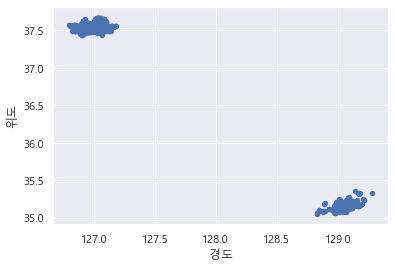

In [17]:
shop_2019[:1000].plot.scatter(x="경도", y="위도", grid="True")

In [18]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 39)

In [19]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          344270
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23587
표준산업분류명       23587
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75924
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        354031
건물관리번호            0
건물명          205736
도로명주소             0
구우편번호             0
신우편번호             2
동정보          369770
층정보          125634
호정보          343797
경도                0
위도                0
dtype: int64

In [20]:
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [21]:
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   401071  56801    401071   401071    401071   401071    401071   
unique  274470  20473         9        9        94       94       696   
top      점프셈교실    강남점         Q       음식       Q01       한식    Q01A01   
freq      1743    494    131687   131687     41243    41243     27110   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...    법정동명   대지구분명  \
count      401071   377484   377484  ...  401071  401071   
unique        696      211      211  ...     465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...     역삼동      대지   
freq        27110    50833    50833  ...   11866  400708   

                        지번주소             도로명                     건물관리번호  \
count                 401071          401071                     401071   
unique                127572           11941                     128106   
top     서울특별시 종로구 종로6가 262-1  서울특별시 서초구 신반포로  1111016400102700003012054   
freq                     978            3531                       1010   

            건물명             도로명주소    동정보     층정보    호정보  
count    195335            401071  31301  275437  57274  
unique    26219            127287    975     139   2680  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1020               997   5457  178422   6479  

[4 rows x 23 columns]

In [22]:
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  401071.000000  401071.000000
mean       37.544965     126.996983
std         0.048108       0.080574
min        37.434081     126.768169
25%        37.505431     126.928061
50%        37.541162     127.012732
75%        37.571921     127.057331
max        37.692398     127.182588

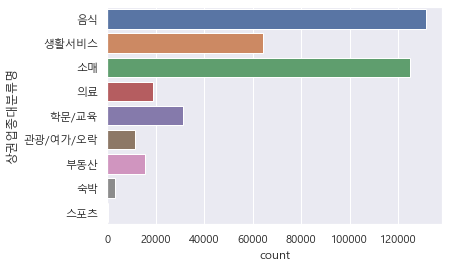

In [23]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [24]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 39)

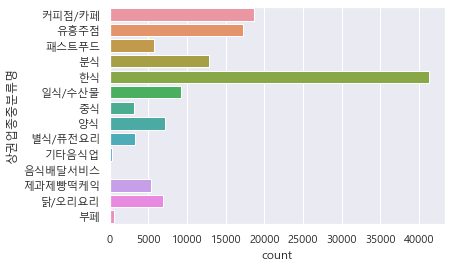

In [25]:
sns.countplot(data=df_food, y="상권업종중분류명")

In [26]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(5683, 39)

In [27]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [28]:
df_fast_food['상호명'].unique()

array(['석봉토스트', '피자마루', '솔로몬피자', ..., '몬스터피자&펍', '피자뽀끼', '피자레볼루션'],
      dtype=object)

## C. 근데 내가 원하는 것은 스타벅스랑 이디야만

상호명에 키워드가 포함되고,  
필터링 된 매장들에 대해 다시금 브랜드명을 부여해서  
브랜드명 만으로 직접 비교 가능하게

In [29]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(502,)

In [30]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(501,)

In [31]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(1003, 39)

In [32]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [33]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'

In [34]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [35]:
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [36]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1219       스타벅스  스타벅스
1676      이디야커피   이디야
1946  스타벅스종로3가점  스타벅스
2840       스타벅스  스타벅스
2886      이디야커피   이디야

In [37]:
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

In [38]:
geo_df = df_cafe

In [39]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## D. 그런데 내가 원하는 것은 구별 브랜드별 점포수

In [40]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   84
1    강남구   이디야   44
2    강동구  스타벅스   13
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   17
7    강서구   이디야   41
8    관악구  스타벅스    9
9    관악구   이디야   23
10   광진구  스타벅스   14
11   광진구   이디야   16
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   19
27  서대문구   이디야   13
28   서초구  스타벅스   48
29   서초구   이디야   19
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   22
34   송파구  스타벅스   28
35   송파구   이디야   27
36   양천구  스타벅스   11
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   28
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   17
46    중구  스타벅스   55
47    중구   이디야   24
48   중랑구  스타벅스    6
49   중랑구   이디야   11

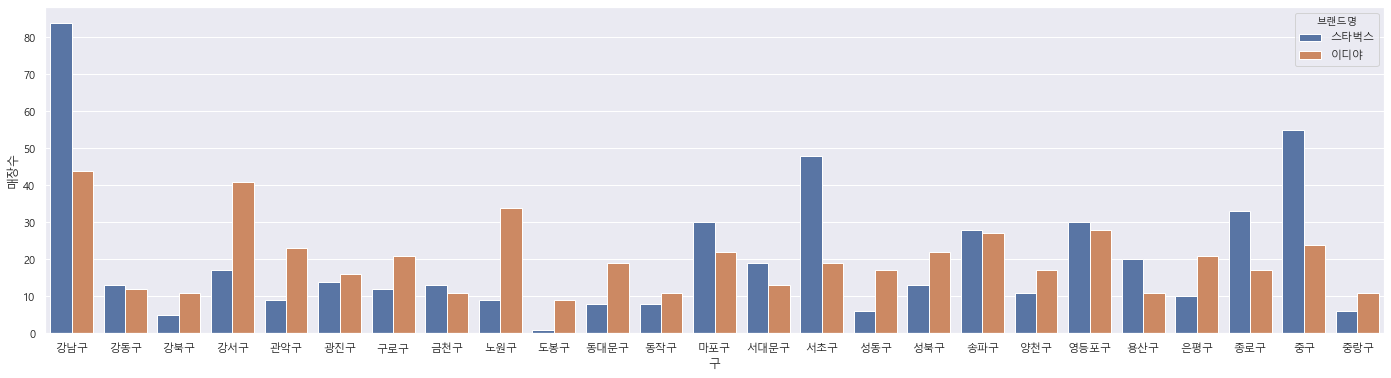

In [41]:
plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')

In [42]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     128
강동구      25
강북구      16
강서구      58
관악구      32
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     32
서초구      67
성동구      23
성북구      35
송파구      55
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

In [43]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

상호명
시군구명     
강남구   128
강동구    25
강북구    16
강서구    58
관악구    32

## E. 멋지게 지도에 찍어볼게: choropleth 그리기

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [44]:
import json

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

### 스타벅스 이디야 카페 매장 합계 분포

In [45]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다. 
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [46]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    84
강동구    13
강북구     5
강서구    17
관악구     9

In [47]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [48]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    44
강동구    12
강북구    11
강서구    41
관악구    23

In [49]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## F. 평범한 지도는 싫다: 매장수 크기를 반영해 CircleMaker 그리기


### Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [50]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

In [51]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    84   44
강동구    13   12
강북구     5   11
강서구    17   41
관악구     9   23

In [52]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

In [53]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    84   44      1  37.506152  127.045159
강동구    13   12      1  37.540512  127.135966
강북구     5   11      0  37.632224  127.022390
강서구    17   41      0  37.556381  126.837973
관악구     9   23      0  37.481693  126.935638

In [54]:
# CircleMarker의 radius 지정시 다음과 같은 타입오류가 나서 float type 으로 변경
# TypeError: Object of type 'int64' is not JSON serializable

df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.1+ KB


In [55]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_brand_vs['매장수비교'],
               columns = [df_cafe_brand_vs.index, 
                          df_cafe_brand_vs['매장수비교']],
               fill_color = 'BuGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location = [df_cafe_brand_vs.loc[gu,'위도'], 
                      df_cafe_brand_vs.loc[gu, '경도']],
            radius = cafe_count,
            color = icon_color,
            popup = msg,
            fill = True,
            fill_color = icon_color
        ).add_to(map)

map

# 더 생각해보기

* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)
* [스타벅스 vs 이디야, 매장 위치에 전략이 있다](https://www.seoul.co.kr/news/newsView.php?id=20160919004005)

#### 지도 출력 시 색상 참고
* http://colorbrewer2.org/

## folium 공부를 위해 더 읽어보면 좋을 것 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
* [PinkWink의 데이터 사이언스 관련 책 - 파이썬으로 데이터 주무르기](https://pinkwink.kr/1070)

## 카토그램 
* [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
* [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)

# Appendix.

## 버전과 한글폰트
* 한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting